In [1]:
#pip install tensorflow
#!pip install numpy
#!pip install scikit-learn
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
X, y = make_moons(n_samples=200, noise=0.1)
y_hat = tf.keras.utils.to_categorical(y, num_classes=2) #one_hot encodeed lables

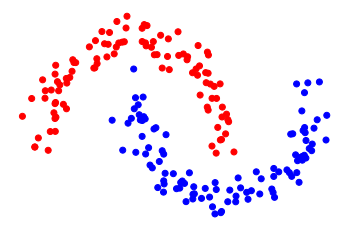

In [4]:
c = ["red" if y_ == 0 else "blue" for y_ in y] # color for eacch class
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

In [5]:
import pennylane as qml
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

In [6]:
@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [7]:
n_layers = 6
weight_shapes = {"weights": (n_layers, n_qubits)}

In [8]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [9]:
clayer_1 = tf.keras.layers.Dense(2)
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")
model = tf.keras.models.Sequential([clayer_1, qlayer, clayer_2])

In [10]:
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])

In [11]:
fitting = model.fit(X, y_hat, epochs=6, batch_size=5, validation_split=0.25, verbose=2)

Epoch 1/6
30/30 - 25s - loss: 0.4367 - accuracy: 0.6733 - val_loss: 0.3004 - val_accuracy: 0.8000
Epoch 2/6
30/30 - 16s - loss: 0.2712 - accuracy: 0.7867 - val_loss: 0.2226 - val_accuracy: 0.8400
Epoch 3/6
30/30 - 16s - loss: 0.2066 - accuracy: 0.8267 - val_loss: 0.1947 - val_accuracy: 0.8000
Epoch 4/6
30/30 - 17s - loss: 0.1830 - accuracy: 0.8533 - val_loss: 0.1794 - val_accuracy: 0.8400
Epoch 5/6
30/30 - 16s - loss: 0.1693 - accuracy: 0.8600 - val_loss: 0.1730 - val_accuracy: 0.8600
Epoch 6/6
30/30 - 16s - loss: 0.1529 - accuracy: 0.8667 - val_loss: 0.1935 - val_accuracy: 0.8400
